In [1]:
import os
import pandas as pd
from glob import glob
import geopandas as gpd
import matplotlib.pyplot as plt

### Inputs

In [2]:
# Read  hype ET
hype = pd.read_csv('../../model/results/timeEVAP_DD.txt',delimiter='\t',index_col=0,skiprows=1)

In [3]:
# read modified shapefile
gdf = gpd.read_file('../../geospacial/shapefiles/modified_shapefiles/Modified_SMMcat.shp')

### Read MODIS


In [4]:
# Directory containing CSV files
directory = '../../../../../../Validation/hype_mean/MOD16A3GF.061/'

# Initialize an empty dataframe to store the merged data
merged_df = pd.DataFrame()

# Get a list of all CSV files in the directory
csv_files = glob(os.path.join(directory, '*.csv'))

In [5]:
# Iterate through each CSV file in the directory
for file_name in csv_files[:]:  # Make a copy of the list to iterate over
    # Read the CSV file into a dataframe
    df = pd.read_csv(file_name, index_col=0)
    
    # Extract the index and column name from the file name
    index_name = os.path.splitext(os.path.basename(file_name))[0]
    
    # If merged_df is empty, directly assign df to it
    if merged_df is None:
        merged_df = df
    else:
        # Merge only the first column of df with merged_df based on the index
        merged_df[index_name] = df.iloc[:, 0]
    
    # Remove the processed file from the list
    csv_files.remove(file_name)

In [6]:
# Rename columns to year
new_columns = {}
for column in merged_df.columns:
    year = column.split('_')[-1]  # Extract year from column name
    new_columns[column] = int(year)  # Convert year to integer and assign as new column name
merged_df.rename(columns=new_columns, inplace=True)

In [7]:
# Sort DataFrame by column names (years)
merged_df = merged_df.sort_index(axis=1)

In [8]:
# Multiply every value in the DataFrame by 0.1
obs_scaled = merged_df * 0.1

In [9]:
# Extract two columns from GeoDataFrame to create a renaming key
renaming_key = gdf[['hru_nhm', 'seg_nhm']]

In [10]:
# Set 'nhm_id' as the index in renaming key DataFrame
renaming_key.set_index('hru_nhm', inplace=True)

In [11]:
# Rename index values in DataFrame using the renaming key
obs_scaled.index = obs_scaled.index.map(renaming_key['seg_nhm'])

In [12]:
# Convert index to integers
obs_scaled.index = obs_scaled.index.astype(int)

# Sort index in ascending order
obs_scaled = obs_scaled.sort_index()

In [13]:
obs_scaled = obs_scaled.transpose()

In [14]:
# Remove index title
obs_scaled.index.name = None

In [15]:
# Convert column headers to integers
obs_scaled.columns = obs_scaled.columns.astype(int)

In [16]:
# Sort columns in ascending order
obs_scaled = obs_scaled.sort_index(axis=1)

In [17]:
obs_scaled

hru_nhm,58183,58184,58185,58186,58188,58189,58192,58193,58194,58197,...,58666,58667,58668,58669,58670,58671,58672,58673,58674,58675
2001,332.064111,264.741162,250.659985,273.547168,269.762622,308.438916,370.807983,308.406714,636.336719,363.258667,...,228.000903,226.658594,225.455127,242.922192,237.672656,262.219287,224.179321,228.616650,214.936230,228.283740
2002,434.820459,391.405786,376.792700,384.733887,372.000098,416.517432,488.153125,431.039258,714.951758,459.024023,...,330.287354,325.221313,326.064258,332.649341,348.961206,355.243115,337.641504,347.567798,297.192944,324.134058
2003,400.433887,341.091113,323.080591,348.669873,343.875806,375.080566,451.266553,365.901245,679.936133,414.342920,...,268.610913,260.264844,291.239014,295.967041,298.127588,322.713379,276.996558,281.378027,285.565942,261.587183
2004,411.697070,386.045654,351.604346,373.451855,364.999194,425.408301,485.949316,412.612549,722.804297,444.505762,...,319.304980,316.273267,318.988184,344.209985,355.307129,361.282397,318.239209,325.334131,291.525293,308.806519
2005,427.042822,403.548657,378.779004,383.682251,379.551611,413.931934,486.934961,406.642188,700.310303,453.947266,...,324.636206,304.010669,327.952539,351.381470,348.486011,367.276733,316.615796,319.182104,287.271289,311.656787
2006,439.619775,420.011182,386.341748,400.543799,406.921533,450.528906,520.604883,431.644727,734.581885,476.501855,...,291.309204,281.805542,283.325903,303.352271,309.015161,322.038013,290.837573,304.564551,291.778271,272.718823
2007,399.799878,356.901782,338.789038,352.047778,347.781079,380.180859,469.290820,382.428027,705.168555,430.988818,...,282.438184,301.299585,301.352222,300.143140,310.482837,328.598755,307.553687,315.263940,282.606665,297.104077
2008,447.006982,409.840186,376.940698,382.070386,378.788843,433.038770,501.351611,423.586768,734.308887,479.580225,...,286.248755,270.625415,291.708472,297.713501,300.764014,329.546045,294.310620,304.538867,295.960132,275.832324
2009,404.834424,375.348169,354.553882,360.450659,345.471509,403.924780,470.765332,402.062012,708.324512,467.595508,...,282.506348,272.962695,293.130688,297.796313,292.341260,324.624805,287.054077,292.451050,291.843555,272.714185
2010,426.915674,383.718066,385.035840,368.742627,396.642554,417.757666,477.861719,405.551099,661.108740,426.522803,...,299.635352,308.127905,295.751343,317.401685,321.026855,329.033545,302.500024,318.799658,315.803491,299.333350


### Analysis

In [18]:
# Convert index to datetime format
hype.index = pd.to_datetime(hype.index)

# Trim dataframe to include only data from 2001 to 2015
hype = hype['2001':'2015']

In [19]:
# Convert index to datetime
hype.index = pd.to_datetime(hype.index)

# Resample to yearly by summing
hype = hype.resample('Y').sum()

In [20]:
# Convert index to datetime
hype.index = pd.to_datetime(hype.index)

# Extract year from datetime index and convert it to integer
hype.index = hype.index.year.astype(int)

In [21]:
# Remove index title
hype.index.name = None

In [22]:
# Convert column headers to integers
hype.columns = hype.columns.astype(int)

In [23]:
# Sort columns in ascending order
hype = hype.sort_index(axis=1)

In [24]:
hype

,58183,58184,58185,58186,58188,58189,58192,58193,58194,58197,...,58666,58667,58668,58669,58670,58671,58672,58673,58674,58675
2001,143.568,189.050,180.739,178.674,166.121,182.608,183.705,176.055,185.401,201.073,...,252.135,229.024,250.066,240.170,236.764,247.869,256.928,240.657,183.083,273.328
2002,320.977,393.542,346.193,366.400,332.226,370.285,358.558,327.557,343.100,310.374,...,477.737,438.438,508.814,471.729,476.993,507.817,496.182,443.015,398.310,431.405
2003,197.800,260.627,241.454,241.951,219.821,240.810,226.540,219.313,222.441,214.228,...,326.472,321.033,357.727,341.520,329.937,392.276,374.820,345.274,302.268,317.359
2004,263.754,344.628,318.042,328.828,306.948,343.251,313.232,308.573,317.931,327.305,...,429.585,468.508,441.146,468.830,475.887,483.401,464.983,460.662,316.165,436.413
2005,310.619,372.079,336.297,355.068,336.574,388.754,366.356,366.157,401.020,389.089,...,353.006,277.783,352.139,333.960,323.992,376.922,368.208,371.854,268.907,336.444
2006,202.526,264.530,246.846,249.434,235.639,259.216,251.325,242.400,259.836,266.974,...,262.393,278.082,257.806,245.977,252.519,238.663,271.244,266.442,221.913,280.547
2007,194.318,252.656,236.913,241.408,230.435,265.294,257.044,238.508,256.575,265.736,...,270.543,266.277,289.538,277.121,275.758,315.798,343.625,350.062,287.306,281.394
2008,295.068,373.353,347.957,351.067,325.779,354.704,336.679,320.869,327.296,290.510,...,325.452,283.722,333.109,320.701,322.331,324.595,338.675,345.338,339.622,314.953
2009,244.951,313.458,291.792,298.962,275.893,299.143,285.445,269.924,279.886,276.059,...,332.478,294.046,351.900,312.584,307.476,353.330,385.895,414.021,372.280,315.290
2010,319.632,393.408,353.137,375.635,354.073,406.894,378.121,375.711,397.653,380.232,...,410.127,403.129,415.314,399.740,404.567,404.871,417.674,441.254,429.152,428.784


In [25]:
# Create a new DataFrame `difference` by subtracting `sca` from `hype`
# change this operation to whatever you want
difference= hype - obs_scaled

In [26]:
difference

,58183,58184,58185,58186,58188,58189,58192,58193,58194,58197,...,58666,58667,58668,58669,58670,58671,58672,58673,58674,58675
2001,-188.496111,-75.691162,-69.920985,-94.873168,-103.641622,-125.830916,-187.102983,-132.351714,-450.935719,-162.185667,...,24.134097,2.365406,24.610873,-2.752192,-0.908656,-14.350287,32.748679,12.040350,-31.853230,45.044260
2002,-113.843459,2.136214,-30.599700,-18.333887,-39.774098,-46.232432,-129.595125,-103.482258,-371.851758,-148.650023,...,147.449646,113.216687,182.749742,139.079659,128.031794,152.573885,158.540496,95.447202,101.117056,107.270942
2003,-202.633887,-80.464113,-81.626591,-106.718873,-124.054806,-134.270566,-224.726553,-146.588245,-457.495133,-200.114920,...,57.861087,60.768156,66.487986,45.552959,31.809412,69.562621,97.823442,63.895973,16.702058,55.771817
2004,-147.943070,-41.417654,-33.562346,-44.623855,-58.051194,-82.157301,-172.717316,-104.039549,-404.873297,-117.200762,...,110.280020,152.234733,122.157816,124.620015,120.579871,122.118603,146.743791,135.327869,24.639707,127.606481
2005,-116.423822,-31.469657,-42.482004,-28.614251,-42.977611,-25.177934,-120.578961,-40.485188,-299.290303,-64.858266,...,28.369794,-26.227669,24.186461,-17.421470,-24.494011,9.645267,51.592204,52.671896,-18.364289,24.787213
2006,-237.093775,-155.481182,-139.495748,-151.109799,-171.282533,-191.312906,-269.279883,-189.244727,-474.745885,-209.527855,...,-28.916204,-3.723542,-25.519903,-57.375271,-56.496161,-83.375013,-19.593573,-38.122551,-69.865271,7.828177
2007,-205.481878,-104.245782,-101.876038,-110.639778,-117.346079,-114.886859,-212.246820,-143.920027,-448.593555,-165.252818,...,-11.895184,-35.022585,-11.814222,-23.022140,-34.724837,-12.800755,36.071313,34.798060,4.699335,-15.710077
2008,-151.938982,-36.487186,-28.983698,-31.003386,-53.009843,-78.334770,-164.672611,-102.717768,-407.012887,-189.070225,...,39.203245,13.096585,41.400528,22.987499,21.566986,-4.951045,44.364380,40.799133,43.661868,39.120676
2009,-159.883424,-61.890169,-62.761882,-61.488659,-69.578509,-104.781780,-185.320332,-132.138012,-428.438512,-191.536508,...,49.971652,21.083305,58.769312,14.787687,15.134740,28.705195,98.840923,121.569950,80.436445,42.575815
2010,-107.283674,9.689934,-31.898840,6.892373,-42.569554,-10.863666,-99.740719,-29.840099,-263.455740,-46.290803,...,110.491648,95.001095,119.562657,82.338315,83.540145,75.837455,115.173976,122.454342,113.348509,129.450650


In [27]:
mean_annual_difference= difference.mean()

In [28]:
# Convert difference Series to a DataFrame
mean_annual_difference_df = pd.DataFrame(mean_annual_difference, columns=['Mean'])

In [29]:
mean_annual_difference_df.max()

Mean    135.916629
dtype: float64

In [30]:
mean_annual_difference_df.min()

Mean   -1987.483795
dtype: float64

In [31]:
# Find the index of the minimum value
min_index=mean_annual_difference_df.idxmin()
min_index

Mean    58651
dtype: int64

In [32]:
mean_annual_difference_df.mean()

Mean    18.550071
dtype: float64

### Plot heatmap

In [33]:
# Merge column_means_df onto gdf by the index in column_means_df and seg_nhm column in gdf
merged_gdf = gdf.merge(mean_annual_difference_df, left_on='seg_nhm', right_index=True)

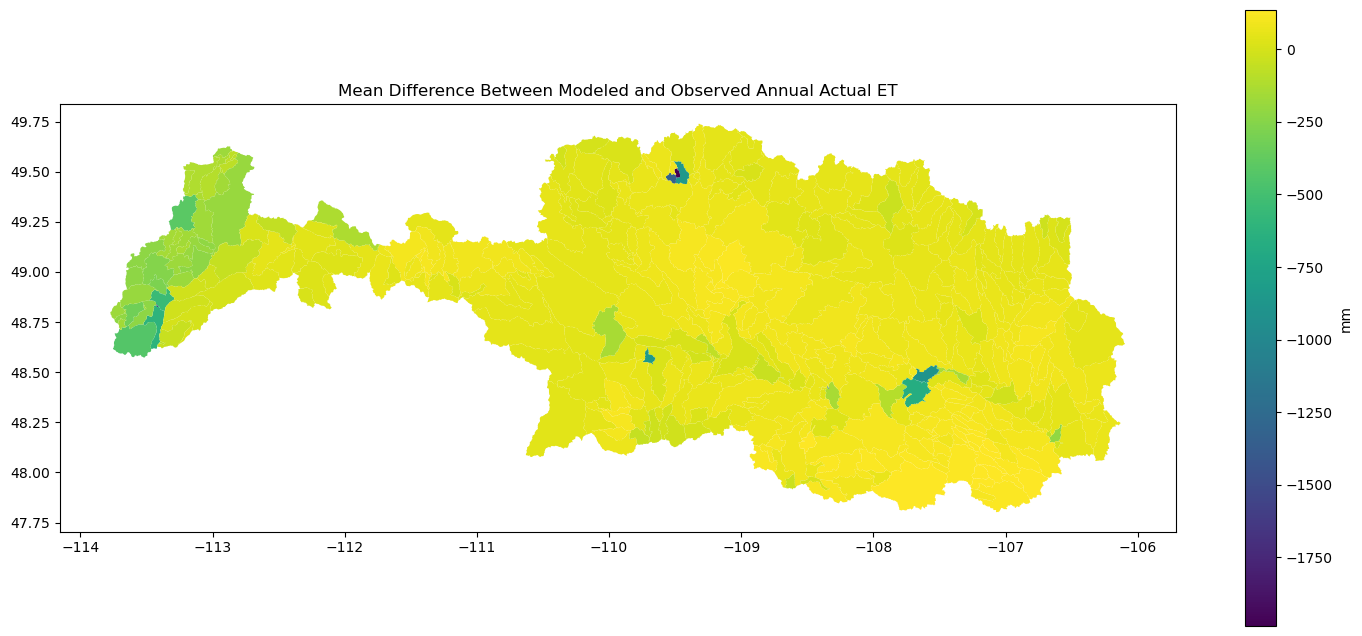

In [34]:
# Plot a heatmap of the 'Mean' column with adjusted figure size
ax = merged_gdf.plot(column='Mean', cmap='viridis', legend=True, figsize=(18, 8))

# Add title to the plot
ax.set_title('Mean Difference Between Modeled and Observed Annual Actual ET')

# Get the color bar instance
cbar = ax.get_figure().get_axes()[1]

# Add units to the color bar
cbar.set_ylabel('mm')

# Save the plot as PNG to a specific location
plt.savefig('../../model/plots/et.png')

# Show the plot
plt.show()